# Proyecto 3 - Ataques a modelos de Deep Learning
Security Data Science

Sergio Marchena - 16387

UVG

In [35]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import seaborn as sns

## 1. Se debe mostrar un entrenamiento y predicción del modelo original 

In [36]:
dir = 'malimg_paper_dataset_imgs'
batches = ImageDataGenerator().flow_from_directory(directory=dir, target_size=(64,64), batch_size=10000)
imgs, labels = next(batches)

Found 9339 images belonging to 25 classes.


In [37]:
x_train, x_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

print('y_train:', x_train.shape)
print('y_test: ', x_test.shape)

x_train: (6537, 64, 64, 3)
x_test:  (2802, 64, 64, 3)
y_train: (6537, 64, 64, 3)
y_test:  (2802, 64, 64, 3)


In [38]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test,  y_test, verbose=2)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


2022-05-12 21:11:52.478133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 - 1s - loss: 0.0907 - accuracy: 0.9764 - 878ms/epoch - 10ms/step
accuracy: 97.64%


In [39]:
y_predict = np.argmax(loaded_model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=1)

2022-05-12 21:11:53.377078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [40]:
c_matrix = metrics.confusion_matrix(y_test, y_predict)

In [41]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=10):
    df_cm = pd.DataFrame( confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",  cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


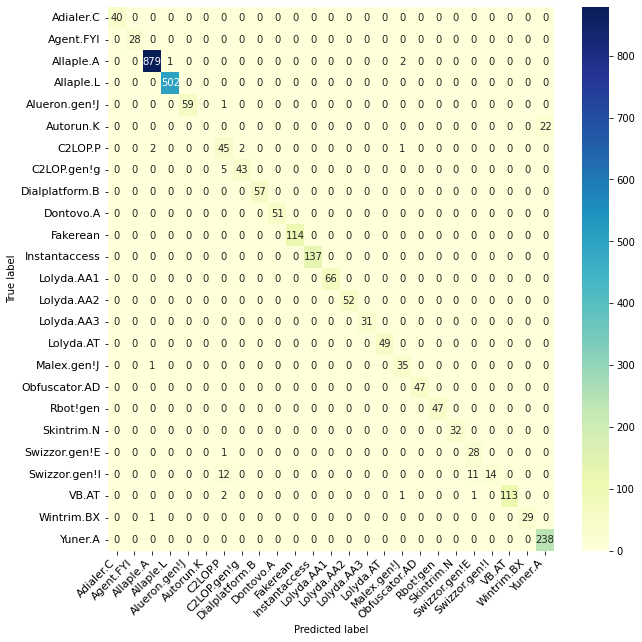

In [42]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (10,10), fontsize=11)

In [44]:
print('test')
print('Hola mundo')

test
Hola mundo
